In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline


In [284]:
df = pd.read_csv('./vgsales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [285]:
#Cleaning Data
#chick the missing values
df.isna().sum()
#replac missing values of the years by 0
df.Year.fillna(value=0 , inplace=True)
#drop the rows with missing values of publisher
df.dropna(subset=['Publisher'], inplace=True)
df.isna().sum()

#removing Whitespace
columns = [1, 2, 4, 5]
result = map(lambda x: df.x.str.strip(), columns)

#changing the type of Year column from float to int
df['Year'] = df.Year.astype('int64')
df.dtypes

#sort according to years
df.sort_values('Year', ascending=True, inplace=True)

#chick for duplicate rows
print(df.drop_duplicates().size, df.size)
#the size is the same SO no duplicates rows


181940 181940


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

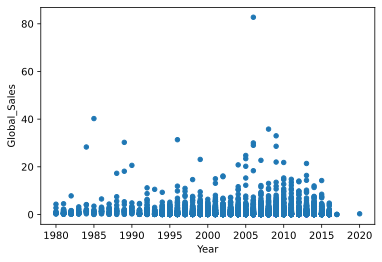

In [286]:

#chick for outlier values
#create Scatter Plot
df_EDA = df[df.Year != 0]
df_EDA.plot.scatter(x='Year', y='Global_Sales')



<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

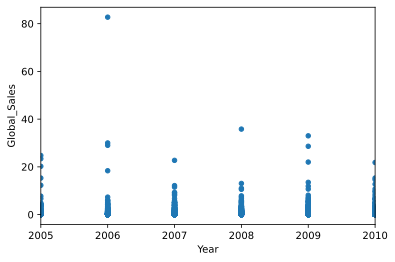

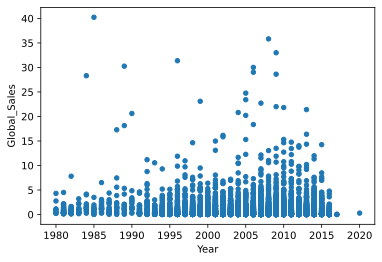

In [287]:
#scale to determine the specific "Year" of the outlier value on Global Sales
df_EDA.plot.scatter(x='Year', y='Global_Sales', xlim=(2005, 2010))

#from the scatter plot we determinte the outlier value is in the year 2006
#delet outlier
df = df[df.Global_Sales != 82.74]
df_EDA = df_EDA[df_EDA.Global_Sales != 82.74]
df_EDA.plot.scatter(x='Year', y='Global_Sales')

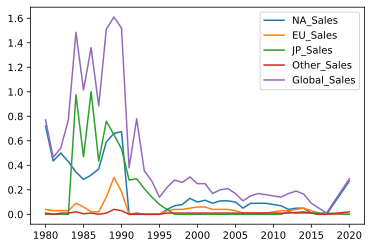

In [288]:
#EDA

#average sale through the years
df_year_median = df_EDA.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].median().reset_index()
for column in df_year_median.iloc[:, [1, 2, 3, 4, 5]]:
    plt.plot(df_year_median['Year'], df_year_median[column],)
    plt.legend(list(map(lambda column: column, df_year_median.iloc[:, [1, 2, 3, 4, 5]])))


<AxesSubplot:xlabel='Year', ylabel='Count'>

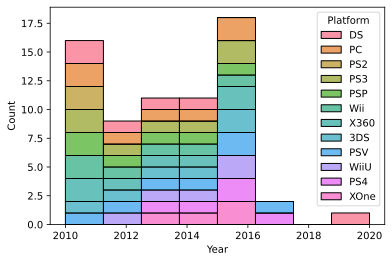

In [289]:
#popular platforms last 10 years 
df_Platform_median = df_EDA.groupby(['Year', 'Platform'])[['Global_Sales']].median().reset_index()
df_Platform_median = df_Platform_median[df_Platform_median.Year >= 2010]

sns.histplot(data=df_Platform_median, x="Year", hue="Platform", multiple="stack")

<AxesSubplot:xlabel='Year', ylabel='Count'>

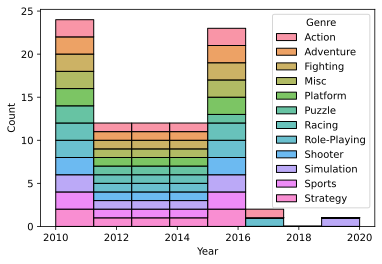

In [290]:
#popular genres last 10 years 
df_Genre_median = df_EDA.groupby(['Year', 'Genre'])[['Global_Sales']].median().reset_index()
df_Genre_median = df_Genre_median[df_Genre_median.Year >= 2010]

sns.histplot(data=df_Genre_median, x="Year", hue="Genre", multiple="stack")

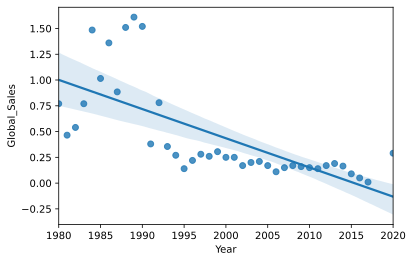

In [297]:
df_year_mean = df_EDA.groupby('Year')[['Global_Sales']].median().reset_index()
sns.regplot(x="Year", y="Global_Sales", data=df_year_mean);